In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [225]:
data= pd.read_csv('loantrain.csv')

In [226]:
data.shape

(614, 13)

In [227]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [229]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [230]:
data['Credit_History']=data['Credit_History'].astype('O')

In [231]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001098,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [232]:
# we will drop ID because it is not important for our model
data.drop('Loan_ID',axis=1,inplace=True)

In [233]:
data.duplicated().any()

False

percentage of Y class : 0.69
percentage of N class : 0.31


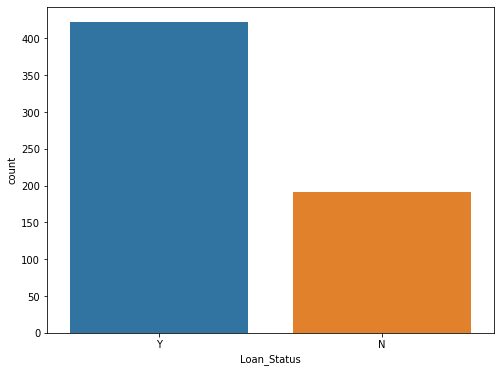

In [234]:
plt.figure(figsize=(8,6))
sns.countplot(data['Loan_Status'])
print('percentage of Y class : %.2f' % (data['Loan_Status'].value_counts()[0]/len(data)))
print('percentage of N class : %.2f' % (data['Loan_Status'].value_counts()[1]/len(data)))

In [235]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# We will first go through categorical features

In [236]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y


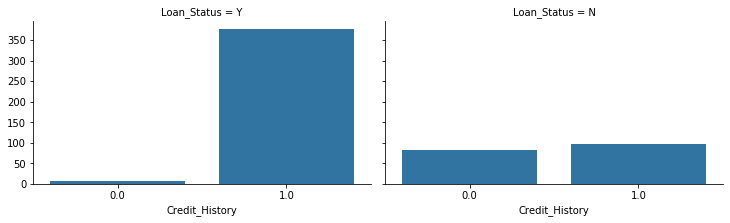

In [237]:
# credit history

grid= sns.FacetGrid(data,col='Loan_Status',size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


# we didn't give a loan for most people who got Credit History = 0
# but we did give a loan for most of people who got Credit History = 1
# so we can say if you got Credit History = 1 , you will have better chance to get a loan

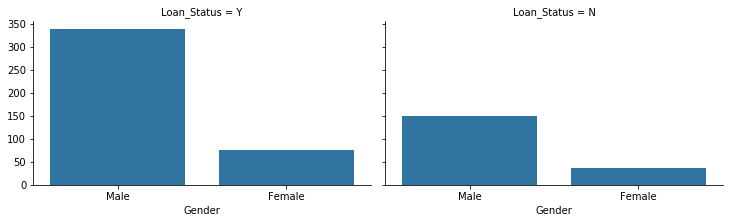

In [238]:
# gender
grid= sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect= 1.6)
grid.map(sns.countplot,'Gender')


# most males got loan and most females got one too so (No pattern)

# i think it's not so important feature, we will see later

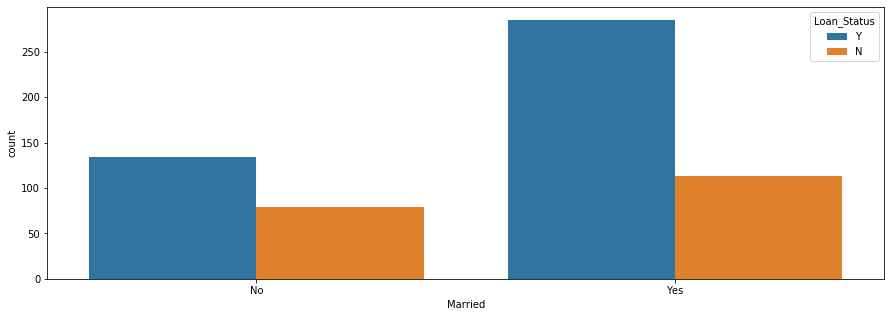

In [239]:
#married
plt.figure(figsize=(15,5))
sns.countplot(x='Married',hue='Loan_Status',data=data)

# most people who get married did get a loan
# if you'r married then you have better chance to get a loan :)
# good feature

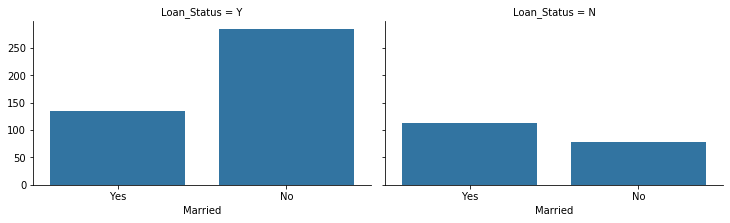

In [240]:
grid= sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect= 1.6)
grid.map(sns.countplot,'Married')


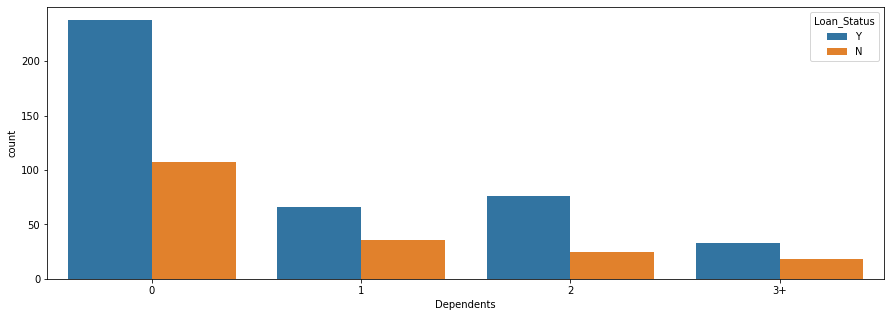

In [241]:
# dependents
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents',hue='Loan_Status',data=data)

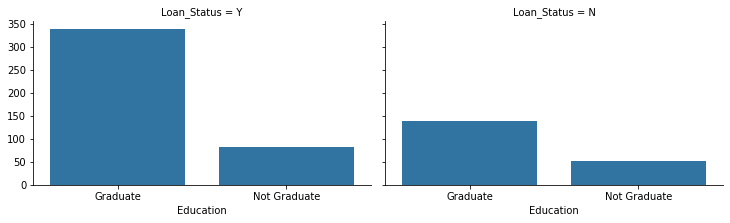

In [242]:
# education

grid= sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

# If you are graduated or not, you will get almost the same chance to get a loan (No pattern)
# Here you can see that most people did graduated, and most of them got a loan
# on the other hand, most of people who did't graduate also got a loan, but with less percentage from people who graduated

# not important feature

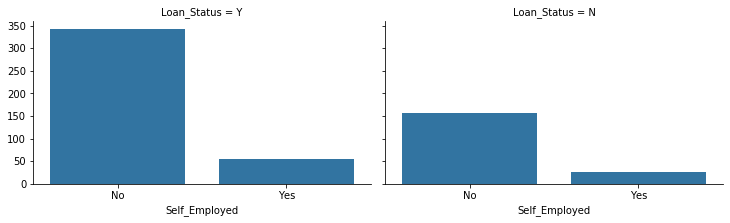

In [243]:
#self employed
grid= sns.FacetGrid(data,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Self_Employed')

#no pattern found

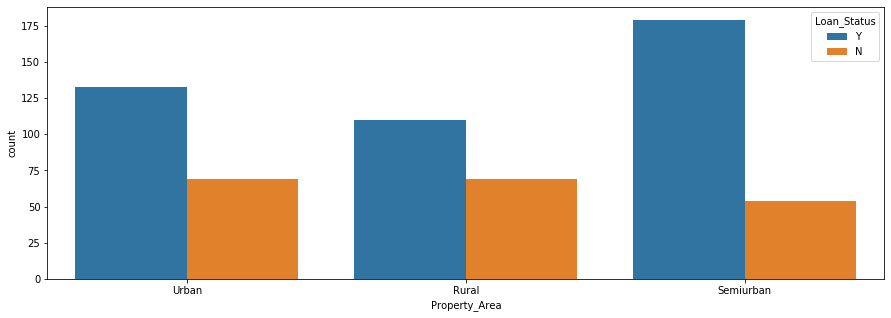

In [244]:
# property area
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=data)

# We can say, Semiurban Property_Area got more than 50% chance to get a loan

# good feature

In [245]:
data.groupby('Loan_Status').median()

# we can see that when ewe got low median in capital income we got loan status as no

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [246]:
# HANDELING OF MISSING VALUES

data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [247]:
# we will seperate the numerical columns from categorical
cat_data=[]
num_data=[]

for i,c in enumerate(data.dtypes) :
    if c== object :
        cat_data.append(data.iloc[:,i])
    else :
        num_data.append(data.iloc[:,i])

In [248]:
cat_data= pd.DataFrame(cat_data).transpose()
num_data= pd.DataFrame(num_data).transpose()

In [249]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [250]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [251]:
# cata_data 
# if you want to fill every column with its own most frequent value 

cat_data= cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()  # no more missing data

False

In [252]:
 # num_data
# fill every missing value with their previous value in the same column

num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

False

In [253]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [254]:
# transform the target column


target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)
            

In [255]:
# transforming other columns
for i in cat_data :
    cat_data[i]= le.fit_transform(cat_data[i])

In [256]:
target.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [257]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [258]:
data=  pd.concat([cat_data,num_data,target],axis=1)

In [259]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [260]:
# train the data

In [261]:
x= pd.concat([cat_data,num_data],axis=1)
y= target

In [262]:
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train,test in sss.split(x,y) :
    x_train, x_test = x.iloc[train],x.iloc[test]
    y_train, y_test= y.iloc[train],y.iloc[test]

In [263]:
    
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',data['Loan_Status'].value_counts().values/ len(data))


x_train shape (491, 11)
y_train shape (491,)
x_test shape (123, 11)
y_test shape (123,)

ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [264]:
# we will use four different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

In [265]:
# loss function
from sklearn.metrics import precision_score , recall_score , f1_score , log_loss , accuracy_score
  
def loss(y_true , y_pred , retu=False) :
        pre= precision_score(y_true,y_pred)
        rec= recall_score(y_true,y_pred)
        f1= f1_score(y_true,y_pred)
        loss=log_loss(y_true,y_pred)
        acc= accuracy_score(y_true,y_pred)
        
        if retu:
           return pre, rec, f1, loss, acc
        else:
         print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))


In [266]:
# train_evel_train

def train_eval_train(models,x,y) :
    for name, model in models.items() :
        print(name,':')
        model.fit(x,y)
        loss(y, model.predict(x))
train_eval_train(models,x_train,y_train)

LogisticRegression :
  pre: 0.930
  rec: 0.429
  f1: 0.587
  loss: 6.542
  acc: 0.811
KNeighborsClassifier :
  pre: 0.667
  rec: 0.364
  f1: 0.471
  loss: 8.863
  acc: 0.743
SVC :
  pre: 1.000
  rec: 0.013
  f1: 0.026
  loss: 10.692
  acc: 0.690
DecisionTreeClassifier :
  pre: 0.929
  rec: 0.422
  f1: 0.580
  loss: 6.612
  acc: 0.809


In [267]:
x_train.shape

(491, 11)

In [268]:
# train_eval_cross
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

def train_eval_cross(models, X, y, folds):
    # we will change X & y to dataframe because we will use iloc (iloc don't work on numpy array)
    X = pd.DataFrame(X) 
    y = pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')

        for train, test in folds.split(X, y):
            model.fit(X.iloc[train], y.iloc[train]) 
            y_pred = model.predict(X.iloc[test]) 
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)
        
train_eval_cross(models, x_train, y_train, skf)

LogisticRegression :
 pre     0.894048
 rec     0.422500
 f1      0.562733
 loss    6.752695
 acc     0.804490
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.379834
 rec      0.207500
 f1       0.259954
 loss    12.381887
 acc      0.641510
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    11.043955
 acc      0.680245
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


# Feature Engineering

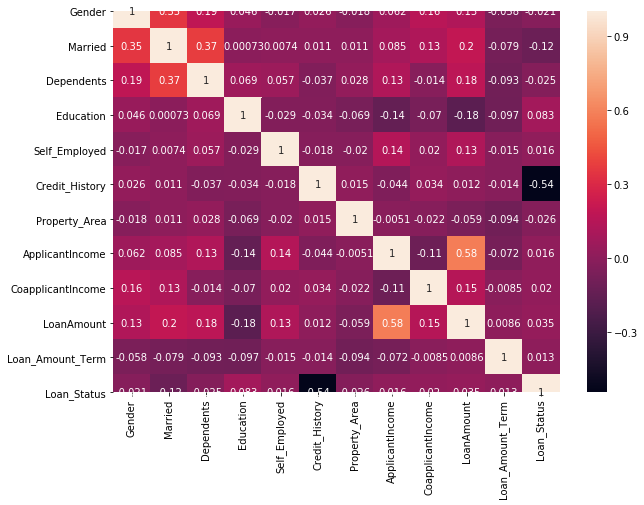

In [269]:
# we saw that credit_history and married are good features , and credit_history is the best.

data_corr= pd.concat([x_train,y_train],axis=1)
corr= data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

# here we got 58% similarity between Loanamount and application income
# and that may be bad for our model .

In [270]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,0,0,0,1,2,2995.0,0.0,60.0,360.0
26,1,1,0,0,0,1,1,2799.0,2253.0,122.0,360.0
394,1,1,2,0,0,1,2,3100.0,1400.0,113.0,360.0
584,1,1,1,0,0,0,0,2787.0,1917.0,146.0,360.0
86,1,1,2,1,0,1,1,3333.0,2000.0,99.0,360.0


In [271]:
x_train['new_col']= x_train['CoapplicantIncome']/x_train['ApplicantIncome']
x_train['new_col_2']= x_train['LoanAmount']*x_train['Loan_Amount_Term']

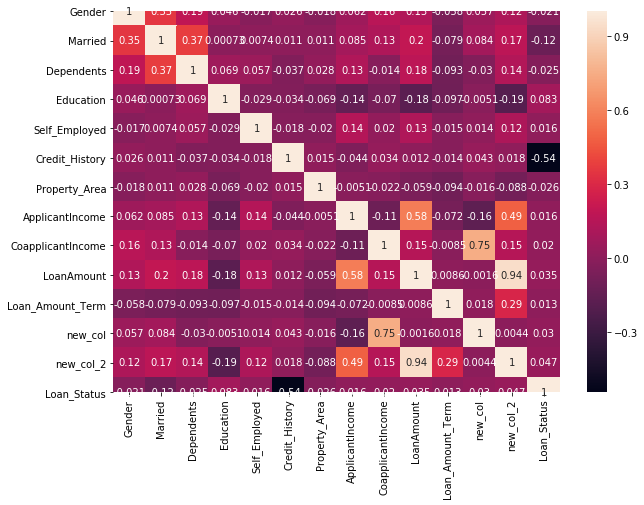

In [272]:
data_corr= pd.concat([x_train,y_train],axis=1)
corr= data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

In [273]:
x_train.drop(['CoapplicantIncome','ApplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)

In [274]:
train_eval_cross(models,x_train,y_train,skf)

# SVC is improving, but LogisticRegression is overfitting

LogisticRegression :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.333095
 rec      0.175417
 f1       0.227944
 loss    12.810451
 acc      0.629102
Name: 0, dtype: float64
------------------------------
SVC :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


In [275]:
# first lets take a look at the value counts of every label

for i in range(x_train.shape[1]):
    print(x_train.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')


1    398
0     93
Name: Gender, dtype: int64
------------------------------------------------
1    315
0    176
Name: Married, dtype: int64
------------------------------------------------
0    292
2     85
1     78
3     36
Name: Dependents, dtype: int64
------------------------------------------------
0    382
1    109
Name: Education, dtype: int64
------------------------------------------------
0    428
1     63
Name: Self_Employed, dtype: int64
------------------------------------------------
1    421
0     70
Name: Credit_History, dtype: int64
------------------------------------------------
1    179
2    170
0    142
Name: Property_Area, dtype: int64
------------------------------------------------
0.000000    222
0.414374      1
0.912892      1
1.258120      1
0.504299      1
           ... 
0.330420      1
2.332134      1
0.844471      1
0.564642      1
0.824769      1
Name: new_col, Length: 270, dtype: int64
------------------------------------------------
43200.0    18
39600

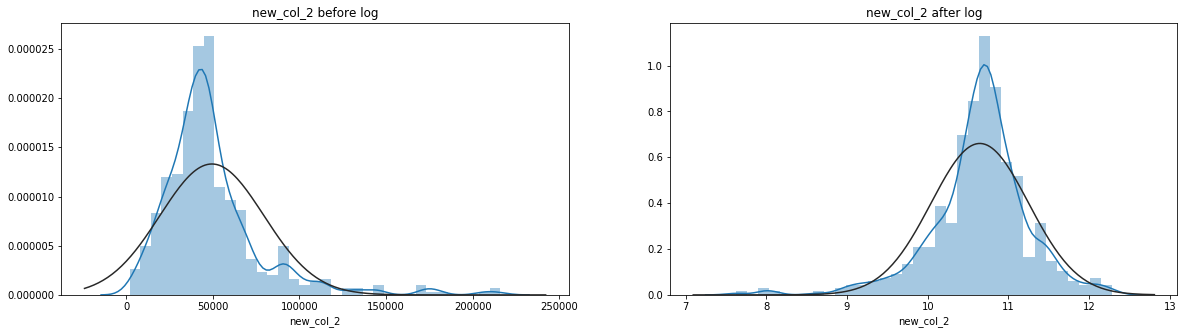

In [276]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(x_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

x_train['new_col_2'] = np.log(x_train['new_col_2'])  # logarithm of all the values

sns.distplot(x_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [277]:
train_eval_cross(models, x_train, y_train, skf)

# wooow our models improved really good by just doing the previous step 

LogisticRegression :
 pre     0.899048
 rec     0.429167
 f1      0.569764
 loss    6.611718
 acc     0.808571
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.685278
 rec     0.336667
 f1      0.439734
 loss    8.860292
 acc     0.743469
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.811548
 rec     0.311667
 f1      0.444833
 loss    7.811411
 acc     0.773837
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.919048
 rec     0.422500
 f1      0.565740
 loss    6.611717
 acc     0.808571
Name: 0, dtype: float64
------------------------------


# Outliers

Text(0.5, 0, '')

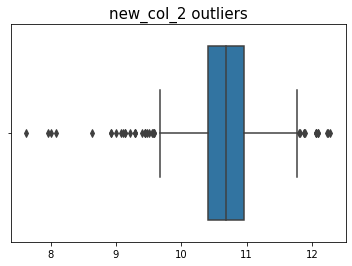

In [278]:
# we will use boxplot to detect outliers

sns.boxplot(x_train['new_col_2']);
plt.title('new_col_2 outliers', fontsize=15);
plt.xlabel('')

In [279]:
threshold = 0.1  # this number is hyper parameter , as much as you reduce it, as much as you remove more points
                 # you can just try different values the deafult value is (1.5) it works good for most cases
                 # but be careful, you don't want to try a small number because you may loss some important information from the data .
                 # that's why I was surprised when 0.1 gived me the best result
            
new_col_2_out = x_train['new_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

data_outliers = pd.concat([x_train, y_train], axis=1)
print('\nlen x_train before dropping the outliers', len(data_outliers))
data_outliers = data_outliers.drop(data_outliers[(data_outliers['new_col_2'] > upper) | (data_outliers['new_col_2'] < lower)].index)

print('len x_train before dropping the outliers', len(data_outliers))

Quartile 25: 10.416008100285975 , Quartile 75: 10.961277846683982
iqr: 0.5452697463980076
Cut Off: 0.05452697463980077
Lower: 10.361481125646174
Upper: 11.015804821323783
Nubers of Outliers: 218
outliers:[9.980448593672257, 10.31692083029347, 10.09823162932864, 11.056588026488308, 11.502875129116727, 12.092679958175083, 11.427367576608582, 11.62589694362939, 10.083305979111964, 11.473352689850405, 11.184421397998193, 9.692766521220475, 10.14878390849147, 10.190169124654325, 10.268130666124037, 10.268130666124037, 10.31692083029347, 8.930626469173578, 11.184421397998193, 10.16277015046621, 10.268130666124037, 11.153962190513484, 9.878169744551839, 7.620705086838262, 11.117212648304742, 11.39143556738252, 11.589886506106357, 11.502875129116727, 11.237962164926222, 10.044987114809828, 9.946547041996576, 9.980448593672257, 9.963641475355875, 11.117212648304742, 11.427367576608582, 11.654425027243928, 11.375041757606843, 11.383272256743357, 12.254862809699606, 11.629107219259637, 7.96554557

In [280]:
x_train= data_outliers.drop('Loan_Status',axis=1)
y_train= data_outliers['Loan_Status']

Text(0.5, 0, '')

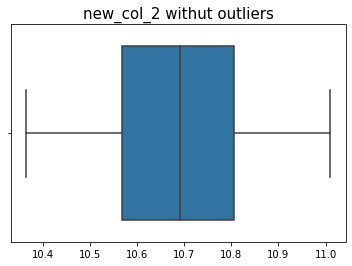

In [281]:
sns.boxplot(x_train['new_col_2'])
plt.title('new_col_2 withut outliers',fontsize=15)
plt.xlabel('')

In [282]:
train_eval_cross(models,x_train,y_train,skf)

LogisticRegression :
 pre     0.908333
 rec     0.535714
 f1      0.663846
 loss    4.678280
 acc     0.864550
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.856667
 rec     0.464286
 f1      0.592113
 loss    5.692522
 acc     0.835185
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    9.109834
 acc     0.736243
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.925000
 rec     0.535714
 f1      0.670256
 loss    4.550356
 acc     0.868254
Name: 0, dtype: float64
------------------------------


# feature selection

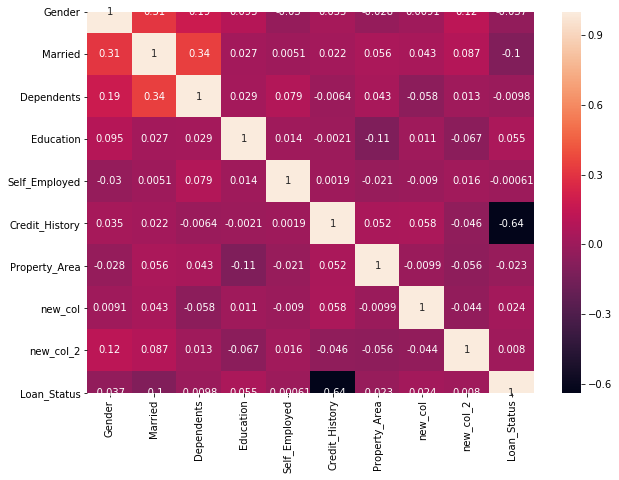

In [283]:
# Self_Employed got really bad corr (-0.00061) , let's try remove it and see what will happen

data_corr= pd.concat([x_train,y_train],axis=1)
corr= data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);


In [284]:
x_train.drop(['Self_Employed'],axis=1,inplace=True)
train_eval_cross(models,x_train,y_train,skf)

LogisticRegression :
 pre     0.908333
 rec     0.535714
 f1      0.663846
 loss    4.678280
 acc     0.864550
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre     0.841667
 rec     0.466071
 f1      0.588990
 loss    5.692523
 acc     0.835185
Name: 0, dtype: float64
------------------------------
SVC :
 pre     0.000000
 rec     0.000000
 f1      0.000000
 loss    9.109834
 acc     0.736243
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.925000
 rec     0.535714
 f1      0.670256
 loss    4.550356
 acc     0.868254
Name: 0, dtype: float64
------------------------------


# evaluating on test_data

In [285]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
182,1,1,0,0,0,1,1,4600.0,0.0,73.0,180.0
440,1,0,0,0,0,1,1,3660.0,5064.0,187.0,360.0
276,1,1,0,0,0,1,1,3993.0,3274.0,207.0,360.0
533,1,0,1,0,0,1,1,11250.0,0.0,196.0,360.0
504,1,1,0,1,0,1,1,3814.0,1483.0,124.0,300.0


In [286]:
x_test_new= x_test.copy()

In [287]:
x=[]

x_test_new['new_col']= x_test_new['CoapplicantIncome']/x_test_new['ApplicantIncome']
x_test_new['new_col_2']= x_test_new['LoanAmount']*x_test_new['Loan_Amount_Term']

x_test_new.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

x_test_new['new_col_2'] = np.log(x_test_new['new_col_2'])

x_test_new['new_col'] = [x if x==0 else 1 for x in x_test_new['new_col']]

In [288]:
x_test_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,new_col,new_col_2
182,1,1,0,0,0,1,1,0.0,9.483416
440,1,0,0,0,0,1,1,1.0,11.117213
276,1,1,0,0,0,1,1,1.0,11.218823
533,1,0,1,0,0,1,1,0.0,11.164219
504,1,1,0,1,0,1,1,1.0,10.524064


In [289]:
x_train.head()

,Gender,Married,Dependents,Education,Credit_History,Property_Area,new_col,new_col_2
26,1,1,0,0,1,1,0.804930,10.690125
394,1,1,2,0,1,2,0.451613,10.613492
584,1,1,1,0,0,0,0.687836,10.869711
86,1,1,2,1,1,1,0.600060,10.481224
416,0,0,1,0,1,2,0.000000,10.961278


In [ ]:
for name,model in models.items():
    print(name, end=':\n')
    loss(y_test, model.predict(X_test_new))
    print('-'*40)
    

In [ ]:
# OUTPUT OF TEST EVALUATION
LogisticRegression:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.458
  acc: 0.813
----------------------------------------
KNeighborsClassifier:
  pre: 0.647
  rec: 0.289
  f1: 0.400
  loss: 9.267
  acc: 0.732
----------------------------------------
SVC:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.458
  acc: 0.813
----------------------------------------
DecisionTreeClassifier:
  pre: 0.895
  rec: 0.447
  f1: 0.596
  loss: 6.458
  acc: 0.813
----------------------------------------